![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

## Getting Started
I first imported some packages I will need in my analysis, imported my files and view them. I next filtered each DataFrame to only contain FIFA World Cup matches and matches from 2002 or later. I then added two columns in each DataFrame that included the total goals scored per game and the gender of the people playing the game. The gender column will be used when I concatinate the DataFrames together to still be able to distinguish which game was which gender. 

In [104]:
# Start your code here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
men_results = pd.read_csv('men_results.csv')
women_results = pd.read_csv('women_results.csv')

In [105]:
print(men_results.info())
men_results.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB
None


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [106]:
print(women_results.info())
women_results.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB
None


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [107]:
#Creating new DataFrames for each gender only containing FIFA World Cup matches
men_results_fifa = men_results[men_results['tournament'] == 'FIFA World Cup']
women_results_fifa = women_results[women_results['tournament'] == 'FIFA World Cup']
print(men_results_fifa['tournament'].unique(), women_results_fifa['tournament'].unique())

#Changing the date column in each DataFrame to dtype datetime
men_results_fifa['date'] = pd.to_datetime(men_results_fifa['date'], errors='coerce')
women_results_fifa['date'] = pd.to_datetime(women_results_fifa['date'], errors='coerce')
print(men_results_fifa['date'].isna().sum(), women_results_fifa['date'].isna().sum())

#Filtering for games since 2002-01-01
men_results_fifa = men_results_fifa[men_results_fifa['date'] >= '2002-01-01']
women_results_fifa = women_results_fifa[women_results_fifa['date'] >= '2002-01-01']
print(men_results_fifa['date'].min(), women_results_fifa['date'].min())
print(men_results_fifa.info())
print(women_results_fifa.info())

['FIFA World Cup'] ['FIFA World Cup']
0 0
2002-05-31 00:00:00 2003-09-20 00:00:00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 25164 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  384 non-null    int64         
 1   date        384 non-null    datetime64[ns]
 2   home_team   384 non-null    object        
 3   away_team   384 non-null    object        
 4   home_score  384 non-null    int64         
 5   away_score  384 non-null    int64         
 6   tournament  384 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 24.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1600 to 4469
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  200 non-null    int64         
 1   date        200 non-null    datetime64[ns]
 

In [108]:
#Creating two new columns for each DataFrame
men_results_fifa['total_goals'] = men_results_fifa['home_score'] + men_results_fifa['away_score']
men_results_fifa['gender'] = 'men'
women_results_fifa['total_goals'] = women_results_fifa['home_score'] + women_results_fifa['away_score']
women_results_fifa['gender'] = 'women'


## Exploring the data
I created a barchart to view the means of the number of goals scored in men's and women's international soccer matches. The mean for women's games appears to be higher than for men's games. Further analysis will show if this difference is statistically significant.
To check if the data in both DataFrames follows a normal distribution, I ran qqplots for each. The data appeared to not hug the normal line, so to further check for normality I performed Anderson-Darling tests on both DataFrames. The test statistic for both DataFrames was much higher than the critical value at a 10% significance level, indicating that the data is not normal. As I want to compare the means using a non-parametric test, I decided the Mann Whitney U test is the best test to use.


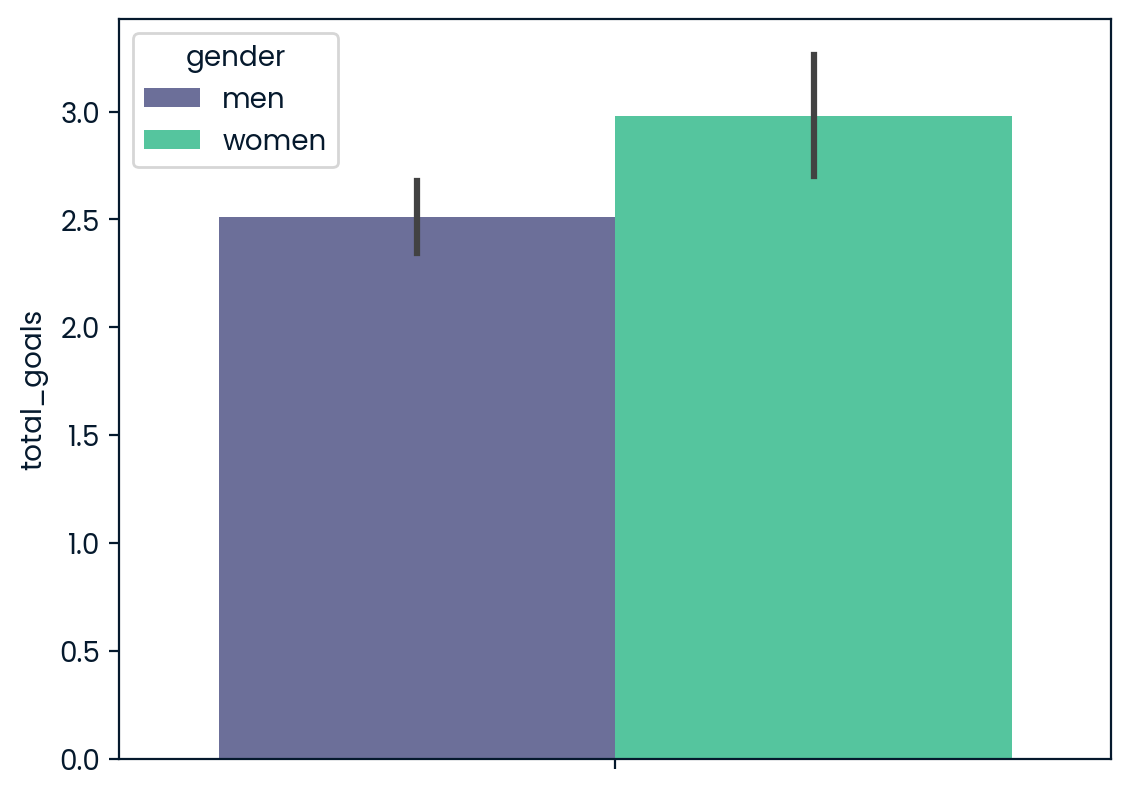

2.5130208333333335 2.98


In [109]:
#Creating a new DataFrame by concatinating men_results and women_results and visualizing the means with a barplot
men_women_total_goals = pd.concat([men_results_fifa[['total_goals', 'gender']], women_results_fifa[['total_goals', 'gender']]], ignore_index=True)
sns.barplot(y='total_goals', hue= 'gender', data=men_women_total_goals)
plt.show()
print(men_results_fifa['total_goals'].mean(), women_results_fifa['total_goals'].mean())

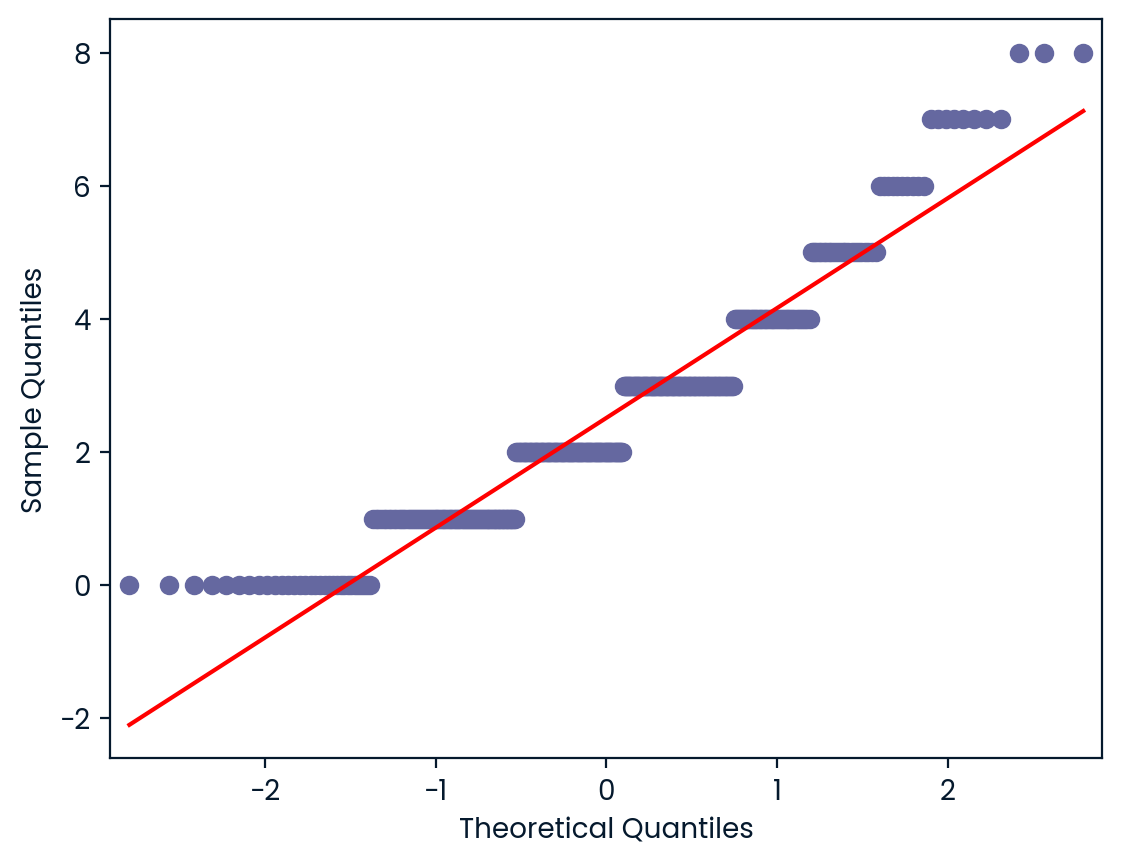

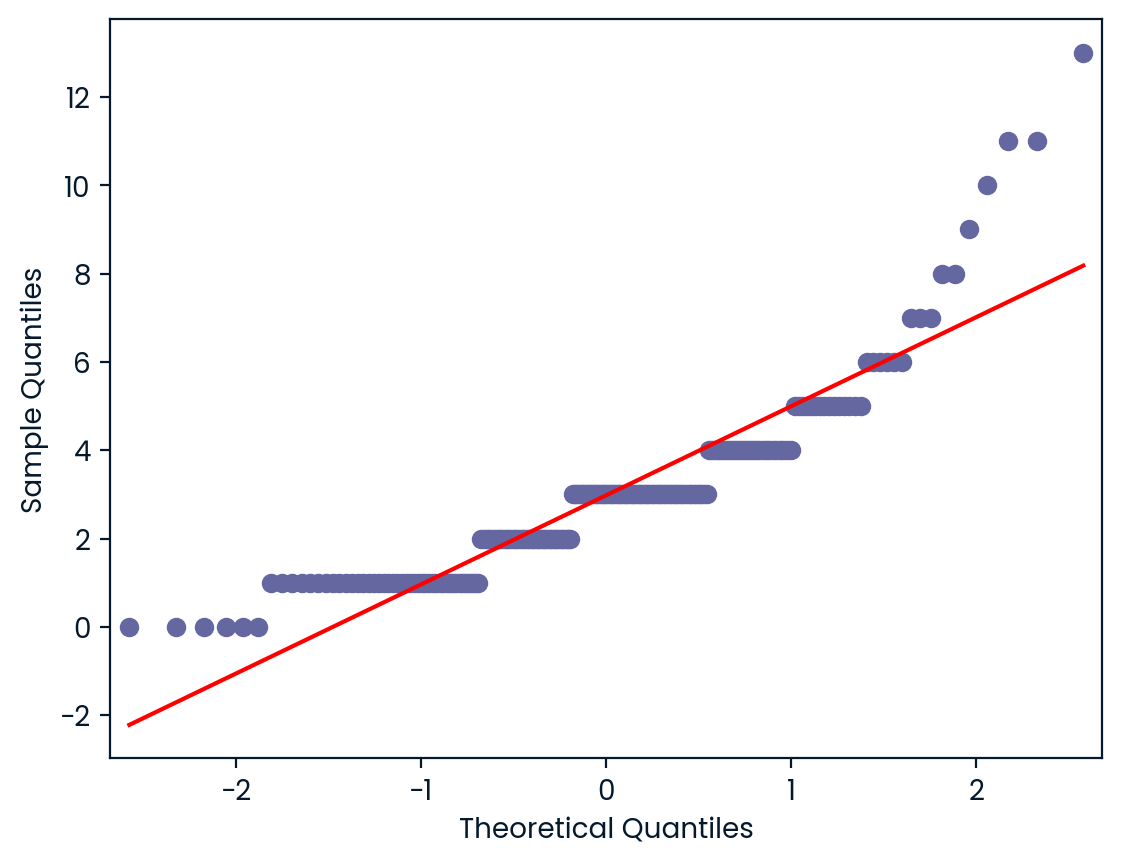

In [110]:
#Checking for normality using qqplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats.distributions import norm
men_results_fifa_qqplot = qqplot(men_results_fifa['total_goals'], line='s', dist=norm)
men_results_fifa_qqplot.show()
women_results_fifa_qqplot = qqplot(women_results_fifa['total_goals'], line='s', dist=norm)
women_results_fifa_qqplot.show()

In [111]:
#Performing Anderson-Darling test to test for normality of men results
from scipy.stats import anderson
result_men = anderson(x=men_results_fifa['total_goals'], dist='norm')
print(result_men.statistic)
print(result_men.significance_level)
print(result_men.critical_values)

9.106793870111062
[15.  10.   5.   2.5  1. ]
[0.57  0.649 0.779 0.909 1.081]


In [112]:
#Performing Anderson-Darling test to test for normality of women results
from scipy.stats import anderson
result_women = anderson(x=women_results_fifa['total_goals'], dist='norm')
print(result_women.statistic)
print(result_women.significance_level)
print(result_women.critical_values)

7.216797148440463
[15.  10.   5.   2.5  1. ]
[0.565 0.644 0.772 0.901 1.071]


## Performing Hypothesis Test: Mann Whitney U
Now that the type of test to use has been determined, the test can be ran. The null hypothesis is that the mean number of goals scored between men's and women's international FIFA World Cup games is the same, and the alternative hypothesis is that the mean number of goals scored in women's games is higher. A right-tailed test will be used, and a 10% significance level will be used. Thus, if the p-value is less than 0.1, the null hypothesis can be rejected. 
Running the Mann Whitney U test produces a p-value of ~ 0.005, so the null hypothesis is rejected. 

In [113]:
from scipy.stats import mannwhitneyu
u_stat, u_pval = mannwhitneyu(women_results_fifa['total_goals'], men_results_fifa['total_goals'], alternative='greater')
print(u_pval)

0.005106609825443641


In [114]:
result_dict = {'p_val': u_pval, 'result': 'reject'}